In [3]:
from scipy import stats
import numpy as np

In [2]:
from statsmodels.stats.weightstats import zconfint

In [4]:
zconfint((9.57 - 9.5)/(0.4/np.sqrt(160)), alternative='two-sided')

IndexError: tuple index out of range

In [5]:
t = (9.57 - 9.5)/(0.4/np.sqrt(160))

In [9]:
norm = stats.norm(0, 1)

In [10]:
2*(1- norm.cdf(t))

0.026856695507523787

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("diamonds.txt", sep = "\t", header = 0)

In [13]:
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
from sklearn.model_selection import train_test_split

In [17]:
target = data["price"].values
data.drop(columns="price", inplace = True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 1)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
m1 = LinearRegression()
m2= RandomForestRegressor(random_state=1)

In [24]:
m1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
m2.fit(X_train, y_train)

/Users/maxim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [32]:
lin_pred = m1.predict(X_test)
tree_pred = m2.predict(X_test)

In [27]:
from matplotlib import pyplot as plt

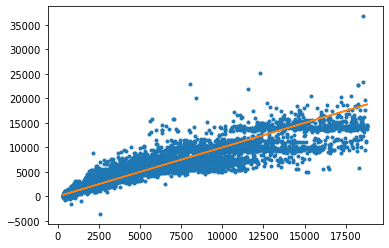

In [30]:
plt.plot(y_test, lin_pred, ".")
plt.plot(y_test, y_test)

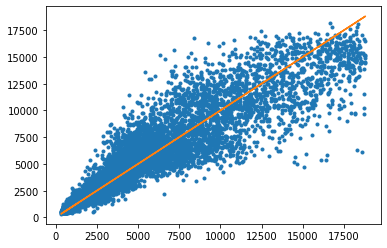

In [33]:
plt.plot(y_test, tree_pred, ".")
plt.plot(y_test, y_test)

In [34]:
tree_pred

array([ 858.55, 7205.6 , 2108.8 , ..., 4711.  , 3435.3 , 1081.9 ])

In [35]:
abs(tree_pred - y_test)

In [36]:
s_lin = abs(lin_pred - y_test)

In [37]:
s_tree 

array([ 294.55, 1291.6 ,  453.2 , ..., 1426.  ,  298.7 ,  281.1 ])

In [38]:
s_lin

array([ 214.42235621, 1016.46053685,   41.87871693, ..., 2171.49180326,
        103.82818096,  159.32529706])

In [39]:
dif = s_tree - s_lin

In [42]:
stats.ttest_rel(s_tree, s_lin)

Ttest_relResult(statistic=-13.017729783878393, pvalue=1.655174575144972e-38)

In [47]:
from statsmodels.stats.weightstats import _tconfint_generic

In [56]:
_tconfint_generic(dif.mean(), dif.std(ddof = 1)/np.sqrt(len(dif)), len(dif)-1, 0.05, 'two-sided')

(-100.62452098634193, -74.28724532595339)

In [54]:
dif.std()

780.1231205387763

In [57]:
DescrStatsW(dif).tconfint_mean()

(-100.62452098634193, -74.28724532595339)